## Imports

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plots_fabi import *
import sys
# Add functions path
sys.path.append('../Functions')
from time import time

## Load Dataset

In [2]:
from datasets import load_stratified_dataset
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_big.csv', labels='category', samples_per_label=1000, random_seed=11)

### Save all results as dictionaries

In [ ]:
results = []

``` python
dict = {
    'model': ...,
    'data': ...,
    'train_acc': ...,
    'test_acc': ...,
    'train_time': ...,
    'pred_time': ...
}
```

## Prepare Dataset

In [ ]:
df.shape

In [5]:
# TfidfVectorizer generates bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_tf: use logarithmic form for frequency
# min_df: minimum numbers of documents a word must be present to keep it
# ngram_range: number of ngrams to use
# stopwords: remove all common pronouns in given language

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                        ngram_range=(1, 2), stop_words='english')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text_lem'], df['category'], random_state = 42)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
def nb():
    clf = MultinomialNB()

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    test_score = clf.score(X_test_tfidf, y_test) * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'Mult Naive Bayes',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }
    
results.append(nb())

In [ ]:
from sklearn.svm import SVC
def svc():
    clf = SVC(random_state=42, max_iter=100000)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    test_score = clf.score(X_test_tfidf, y_test) * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'SVC',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(svc())

In [ ]:
from xgboost import XGBClassifier
def xgb():
    clf = XGBClassifier(random_state=42, max_iter=100000)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    test_score = clf.score(X_test_tfidf, y_test) * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'XGB',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(xgb())

In [3]:
from sklearn.svm import LinearSVC
def lin_svc():
    clf = LinearSVC(random_state=42, dual=False, max_iter=10000)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    test_score = clf.score(X_test_tfidf, y_test) * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'Linear SVC',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(lin_svc())

NameError: name 'results' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
def log():
    clf = LogisticRegression(random_state=42, max_iter=100000)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    test_score = clf.score(X_test_tfidf, y_test) * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'Logistic Reg',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(log())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    clf = RandomForestClassifier(random_state=42)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    test_score = clf.score(X_test_tfidf, y_test) * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'Random Forest',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(rf())

In [ ]:
x = [i['model'] for i in results]
y1 = [i['train_acc'] for i in results]
y2 = [i['test_acc'] for i in results]

bar_adjacent_labels(
    x, 
    [y1, y2], 
    title='Train and test accuracies of different models',
    ylabel='Accuracy'
)

In [ ]:
x = [i['model'] for i in results]
y1 = [i['train_time'] for i in results]
y2 = [i['pred_time'] for i in results]

bar_adjacent_labels(
    x, 
    [y1, y2], 
    title='Train and prediction times for different models',
    ylabel='Time in s'
)

### Accuracy in dependence of training size

In [ ]:
models = {
    'Mult Naive Bayes': nb,
    'SVC': svc,
    #'XGB': xgb,
    'Linear SVC': lin_svc,
    'Logistic Reg': log,
    'Random Forest': rf
}

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                        ngram_range=(1, 2), stop_words='english')

samples = []
results = []
for num_samples in [100, 500, 1000, 2000]:
    start_time = time()
    
    samples.append(num_samples)
    result = {}
    
    ### Get and transform data data ###
    df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_big.csv', labels='category', samples_per_label=num_samples, random_seed=42)

    X_train, X_test, y_train, y_test = train_test_split(df['text_lem'], df['category'], random_state = 42)

    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    ### Get model results ###
    for model in models.keys():
        result[model] = models[model]()
        
    results.append(result)
    
    print('Calculation with {} samples finished in {:.1f}s'.format(num_samples, time()-start_time))

In [ ]:
y1 = {}
y2 = {}

for model in models.keys():
    y1[model] = []
    y2[model] = []
    for sample in range(len(samples)):
        y1[model].append(results[sample][model]['train_acc'])
        y2[model].append(results[sample][model]['test_acc'])
        
plt.figure(figsize=(12, 12))
colors = ['blue', 'red', 'green', 'orange', 'brown']
points = ['o', 'v', '>', 's', 'D', 'x']
count=0
for model in models.keys():
    plt.plot(samples, y1[model], c=colors[count], marker=points[count], linestyle='dashed', label=model+' train')
    plt.plot(samples, y2[model], c=colors[count], marker=points[count], label=model+' test')
    count += 1
plt.legend();

In [ ]:
y1 = {}
y2 = {}

for model in models.keys():
    y1[model] = []
    y2[model] = []
    for sample in range(len(samples)):
        y1[model].append(results[sample][model]['train_time'])
        y2[model].append(results[sample][model]['pred_time'])
        
plt.figure(figsize=(12, 12))
colors = ['blue', 'red', 'green', 'orange', 'brown']
points = ['o', 'v', '>', 's', 'D', 'x']
count=0
for model in models.keys():
    plt.plot(samples, y1[model], c=colors[count], marker=points[count], label=model+' train')
    #plt.plot(samples, y2[model], c=colors[count], label=model+' test')
    count += 1
plt.legend();

## Regularization

In [66]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_big.csv', labels='category', samples_per_label=1000)
X_train, X_test, y_train, y_test = train_test_split(df['text_lem'], df['category'], random_state = 3, test_size=0.1)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Regularization in SVM

In [67]:
test = []
train = []
c_val = []
for c in np.logspace(-1,0,10):
    clf = LinearSVC(random_state=42, dual=False, max_iter=10000, C=c)
    clf.fit(X_train_tfidf, y_train)
    test_, train_ = clf.score(X_test_tfidf, y_test), clf.score(X_train_tfidf, y_train)
    test.append(test_)
    train.append(train_)
    c_val.append(c)

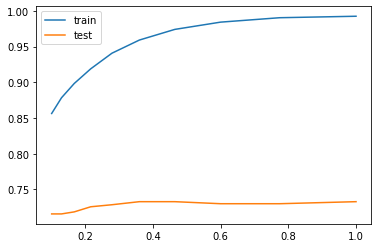

In [68]:
plt.plot(c_val, train, label='train')
plt.plot(c_val, test, label='test')
plt.legend();

### Regularization in Logistic Regression

In [ ]:
test = []
train = []
c_val = []
for c in np.logspace(-1,1,10):
    clf = LogisticRegression(penalty='l2', C=c, max_iter=100000)
    clf.fit(X_train_tfidf, y_train)
    test_, train_ = clf.score(X_test_tfidf, y_test), clf.score(X_train_tfidf, y_train)
    test.append(test_)
    train.append(train_)
    c_val.append(c)

In [ ]:
plt.plot(c_val, train, label='train')
plt.plot(c_val, test, label='test')
plt.legend();

***
Regularization implies, that error occurs due to bias in train test split, not variance!
***

### Check sites the news are from

In [83]:
X_train
#X_train.index.values
X_train
df.loc[X_train.index.values].site.value_counts().head(10)
#df.loc[X_test.index.values].site.value_counts()

yahoo.com                 401
cbs8.com                  371
reuters.com               186
travelandtourworld.com    153
freshnews.com             107
usnews.com                 96
eturbonews.com             94
indiatimes.com             94
thestreet.com              82
palmbeachpost.com          79
Name: site, dtype: int64

In [81]:
# Get wrong predicted texts
clf = LinearSVC(penalty='l2', C=1, max_iter=100000)
clf.fit(X_train_tfidf, y_train)
clf.score(X_test_tfidf, y_test), clf.score(X_train_tfidf, y_train)
df.loc[y_test[(clf.predict(X_test_tfidf) != y_test)].index.values].site.value_counts().head(10)

cbs8.com               17
usnews.com              8
yahoo.com               8
deccanchronicle.com     6
chicagotribune.com      5
indiatimes.com          5
wcax.com                4
news.com.au             4
heraldscotland.com      4
dnaindia.com            4
Name: site, dtype: int64

### Plot word importances for different categories

In [45]:
from word_importances import word_importances
word_imp_train = word_importances(df.loc[X_train.index.values])
word_imp_test = word_importances(df.loc[X_test.index.values])

No handles with labels found to put in legend.


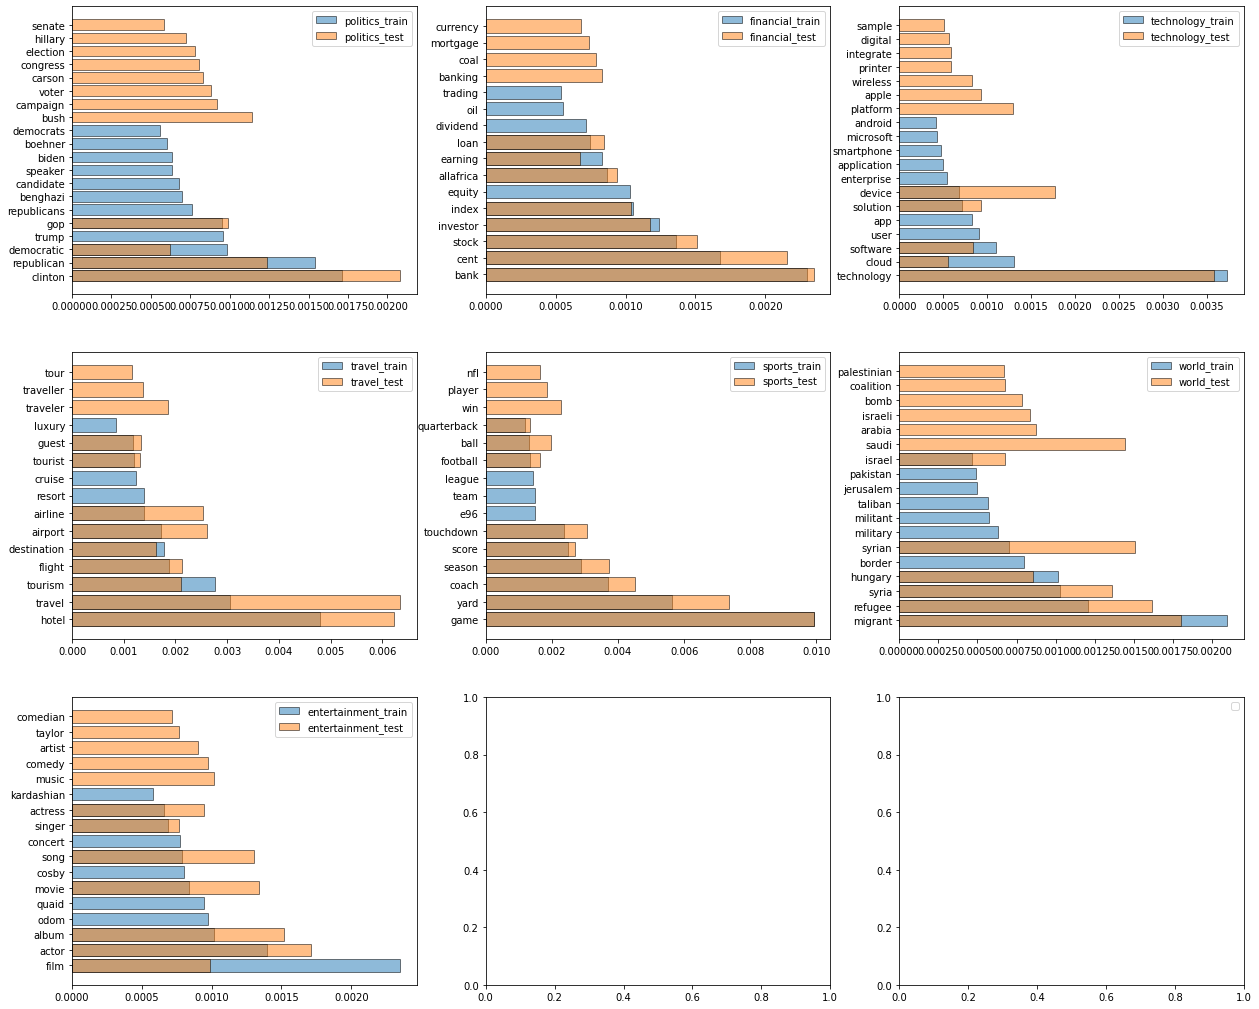

In [61]:
fig, ax = plt.subplots(3,3,figsize=(21,18))
i,j = 0,0
for category in word_imp_train.columns:
    train = word_imp_train[category].sort_values(ascending=False)[:12]
    test = word_imp_test[category].sort_values(ascending=False)[:12]
    
    ax[i,j].barh(train.index, train, edgecolor='black', label=category + '_train', alpha=0.5)
    ax[i,j].barh(test.index, test, edgecolor='black', label=category + '_test', alpha=0.5)
    ax[i,j].legend()
    if j<2:
        j+=1
    else:
        i+=1
        j=0
    
plt.legend();

### SVC different categories

In [62]:
# Load training set
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_big.csv', labels='category', samples_per_label=800)
# Shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)
mid = int(df.shape[0]/2)
X_train, y_train = df[:mid].text, df[:mid].category

# Load test set for every category
df = df[mid:]
test_set = {}
for i in df.category.unique():
    test_set[i] = df[df['category'] == i].text.values

In [64]:
# Fit model
clf = LinearSVC(random_state=42, dual=False, max_iter=10000, C=0.4)
X_train_tfidf = tfidf.fit_transform(X_train)
clf.fit(X_train_tfidf, y_train)

predictions = []
# Get accuracies for categories
for key, value in test_set.items():
    X_test_tfidf = tfidf.transform(value)
    y_test = np.full(value.shape[0], key)
    print('Score for category {: <13}:   {:.1f} %'.format(key, clf.score(X_test_tfidf, y_test)*100))
    # Get Predictions
    cat, val = np.unique(clf.predict(X_test_tfidf), return_counts=True)
    #pred = sorted(list(zip(cat, (val/y_test.shape[0]*100).round(1))) , key=lambda x: x[1], reverse=True)
    predictions.append((cat, (val/y_test.shape[0]*100).round(1)))

Score for category world        :   63.5 %
Score for category technology   :   78.9 %
Score for category travel       :   77.1 %
Score for category politics     :   61.5 %
Score for category entertainment:   75.8 %
Score for category sports       :   76.6 %
Score for category financial    :   76.9 %


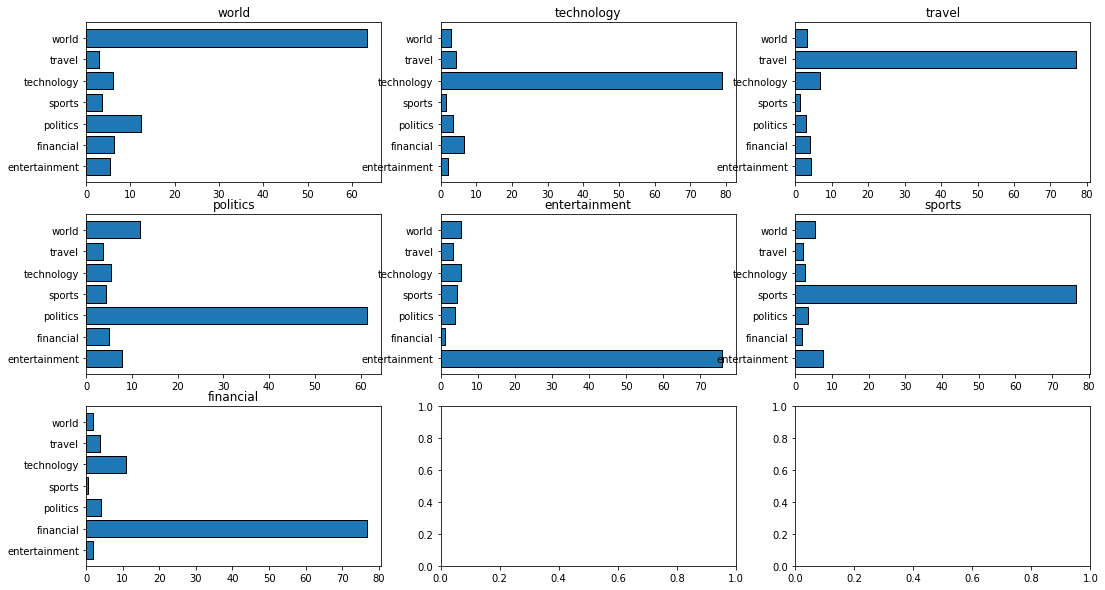

In [65]:
fig, ax = plt.subplots(3,3,figsize=(18,10))
simple_h_bar(predictions[0][0], predictions[0][1], ax=ax[0][0], title=predictions[0][0][np.argmax(predictions[0][1])])
simple_h_bar(predictions[1][0], predictions[1][1], ax=ax[0][1], title=predictions[1][0][np.argmax(predictions[1][1])])
simple_h_bar(predictions[2][0], predictions[2][1], ax=ax[0][2], title=predictions[2][0][np.argmax(predictions[2][1])])
simple_h_bar(predictions[3][0], predictions[3][1], ax=ax[1][0], title=predictions[3][0][np.argmax(predictions[3][1])])
simple_h_bar(predictions[4][0], predictions[4][1], ax=ax[1][1], title=predictions[4][0][np.argmax(predictions[4][1])])
simple_h_bar(predictions[5][0], predictions[5][1], ax=ax[1][2], title=predictions[5][0][np.argmax(predictions[5][1])])
simple_h_bar(predictions[6][0], predictions[6][1], ax=ax[2][0], title=predictions[6][0][np.argmax(predictions[6][1])])